<a href="https://colab.research.google.com/github/vinayykkumar/Forecasting-Trends-with-Powerful-LSTM_Models_Infosys_Internship_Oct2024/blob/Samyuktha/Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Bidirectional LSTM for Time Series Forecasting`**

This project demonstrates how to use a Bidirectional LSTM (Long Short-Term Memory) model to predict future values of a time series dataset.
We use the Daily Minimum Temperatures in Melbourne, Australia (1981–1990) dataset for this demonstration.

In [1]:
!pip install tensorflow pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


Load the Dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)


Extract and Normalize the Data

In [3]:
data = df['Temp'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


Create Input-Output Pairs

In [4]:
def create_dataset(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_dataset(data_scaled, time_steps)


Split the Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build the BiLSTM Model

In [6]:
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=False), input_shape=(time_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train the Model

In [7]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0580 - val_loss: 0.0117
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - val_loss: 0.0115
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - val_loss: 0.0110
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - val_loss: 0.0100
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100 - val_loss: 0.0093
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100 - val_loss: 0.0104
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097 - val_l

Make Predictions and Plot Results

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


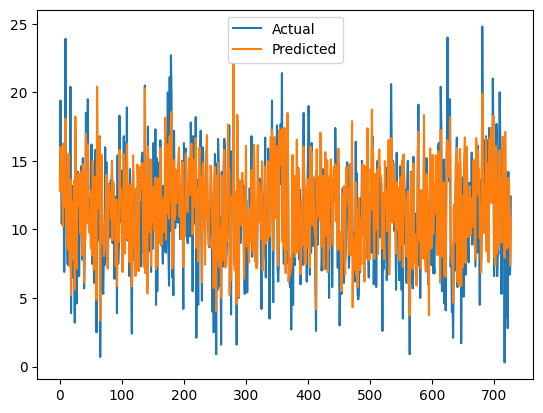

In [8]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.show()
